In [27]:
import matplotlib.pyplot as plt
import numpy as np


In [28]:
# Requirment 1 & 2
def UniformQuantizer(in_val, n_bits, xmax, m):
    L = 2 ** n_bits
    delta = 2 * xmax / L
    q_level = np.zeros(L)
    q_level = np.arange(-xmax + delta / 2, xmax, delta) + m * (delta / 2)
    q_ind = np.zeros(len(in_val), dtype=int)
    for i in range(len(in_val)):
        dist = np.abs(in_val[i] - q_level)
        q_ind[i] = np.argmin(dist)
    return q_ind

def UniformDequantizer(q_ind, n_bits, xmax, m):
    L = 2 ** n_bits
    delta = 2 * xmax / L
    q_level = np.arange(-xmax + delta / 2, xmax, delta) + m * (delta / 2)
    deq_val = q_level[q_ind]
    return deq_val

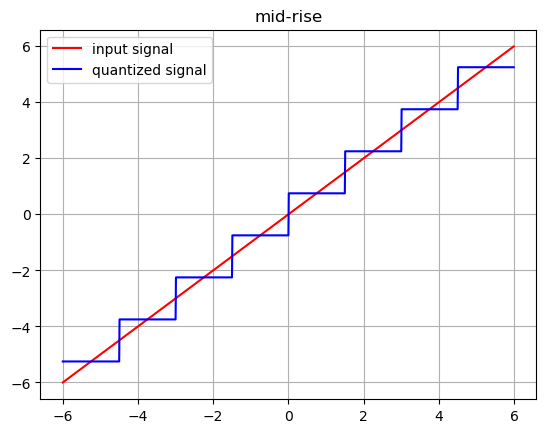

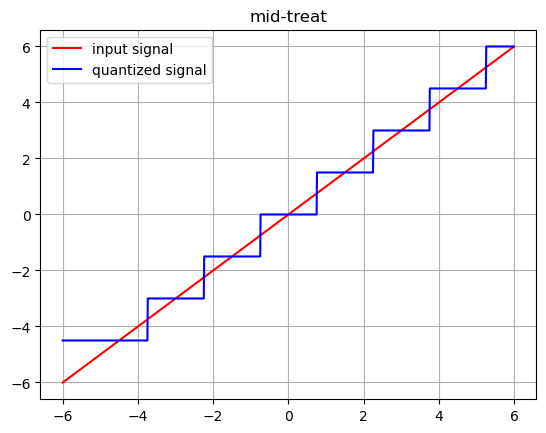

In [33]:
# Requirment 3
n_bits = 3
xmax = 6
m = 0

x = np.arange(-6, 6, 0.01)
q_ind = UniformQuantizer(x, n_bits, xmax, m)
xq = UniformDequantizer(q_ind, n_bits, xmax, m)

plt.plot(x, x, label="input signal",c='r')
plt.plot(x, xq, label="quantized signal",c='b')
plt.title('mid-rise')
plt.grid()
plt.legend()
plt.show()

m = 1

q_ind = UniformQuantizer(x, n_bits, xmax, m)
xq = UniformDequantizer(q_ind, n_bits, xmax, m)

plt.plot(x, x, label="input signal",c='r')
plt.plot(x, xq, label="quantized signal",c='b')
plt.title('mid-treat')
plt.grid()
plt.legend()
plt.show()

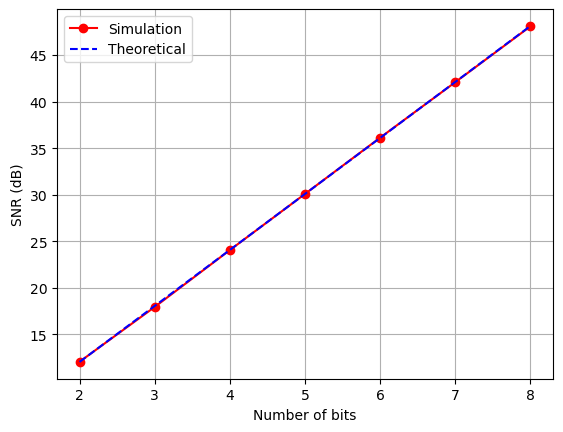

In [34]:
# Requirment 4

# Generate input signal
N = 10000
input_signal = np.random.uniform(-5, 5, N)

# Define quantizer parameters
xmax = 5
m = 0

# Define number of bits to test
n_bits_range = np.arange(2, 9)

# Calculate theoretical SNR for comparison
theoretical_snr = 10*np.log10((3 * (2**n_bits_range)**2 * np.mean(input_signal ** 2)) / xmax**2)
# Initialize SNR array
snr_array = np.zeros(len(n_bits_range))

# Loop over number of bits
for i, n_bits in enumerate(n_bits_range):
    # Quantize input signal
    q_ind = UniformQuantizer(input_signal, n_bits, xmax, m)
    q_val = UniformDequantizer(q_ind, n_bits, xmax, m)
    
    # Calculate quantization error
    quantization_error = input_signal - q_val
    
    # Calculate SNR
    input_power = np.mean(input_signal**2)
    error_power = np.mean(quantization_error**2)
    snr = 10*np.log10(input_power/error_power)
    snr_array[i] = snr
    
# Plot SNR vs number of bits
plt.plot(n_bits_range, snr_array, '-o', label='Simulation',c='r')
plt.plot(n_bits_range, theoretical_snr, '--', label='Theoretical',c='b')
plt.grid()
plt.xlabel('Number of bits')
plt.ylabel('SNR (dB)')
plt.legend()
plt.show()

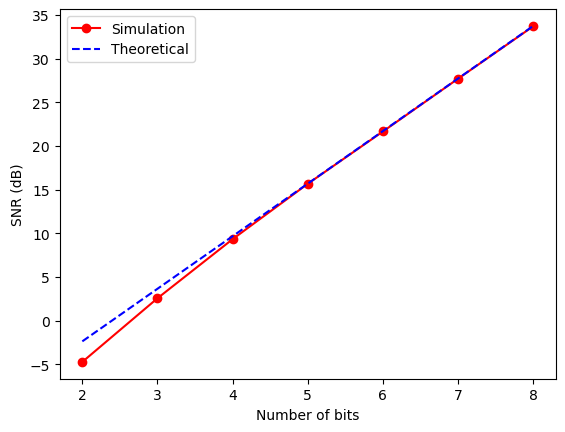

In [35]:
# Generate input signal
N = 10000
polarity = np.random.choice([-1, 1], N, p=[0.5, 0.5])
magnitude = np.random.exponential(1, N)
magnitude /= np.amax(magnitude)
input_signal = polarity * magnitude

# Define quantizer parameters
xmax = 1
m = 0

# Define number of bits to test
n_bits_range = np.arange(2, 9)

# Calculate theoretical SNR for comparison
# theoretical_snr = 6.02*n_bits_range + 1.76
theoretical_snr = 10*np.log10((3 * (2**n_bits_range)**2 * np.mean(input_signal ** 2)) / xmax**2)


# Initialize SNR array
snr_array = np.zeros(len(n_bits_range))

# Loop over number of bits
for i, n_bits in enumerate(n_bits_range):
    # Quantize input signal
    q_ind = UniformQuantizer(input_signal, n_bits, xmax, m)
    q_val = UniformDequantizer(q_ind, n_bits, xmax, m)
    
    # Calculate quantization error
    quantization_error = input_signal - q_val
    
    # Calculate SNR
    input_power = np.mean(input_signal**2)
    error_power = np.mean(quantization_error**2)
    snr = 10*np.log10(input_power/error_power)
    snr_array[i] = snr
    
# Plot SNR vs number of bits
plt.plot(n_bits_range, snr_array, '-o', label='Simulation',c='r')
plt.plot(n_bits_range, theoretical_snr, '--', label='Theoretical',c='b')
plt.xlabel('Number of bits')
plt.ylabel('SNR (dB)')
plt.legend()
plt.show()

In [24]:
 #Define the non-uniform input signal
n = 10000
x = np.random.exponential(1, n)
polarity = np.random.choice([-1, 1], size=n)
x = x * polarity

# Define the parameters for the quantizer
n_bits = 8
xmax = 5
m_values = [0, 5, 100, 200]

# Define the non-uniform 𝝁-law function
def mu_law(x, mu):
        return np.sign(x) * np.log(1 + mu * np.abs(x)) / np.log(1 + mu)

# Define the inverse non-uniform 𝝁-law function
def inv_mu_law(y, mu):
    if mu != 0:
        return np.sign(y) * (1 / mu) * ((1 + mu) ** np.abs(y)) - 1

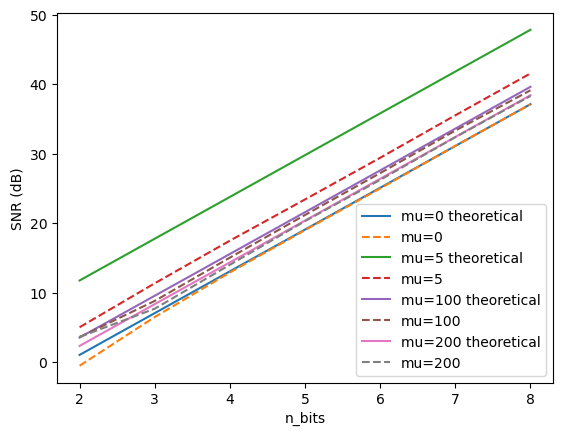

In [26]:
n_bits = np.arange(2, 9)
xmax = 1

SNR = []
SNR_theoretical =[]
# generate exponential distribution random numbers
x = np.random.exponential(1, 10000)
x /= np.amax(x)
signs = np.random.choice([-1, 1], size=(10000,), p=[1./2, 1./2])
x *= (xmax * signs)

for mu in [0, 5, 100, 200]:
    SNR_mu = []
    SNR_theoretical_mu = []
    y=np.copy(x)
    if(mu != 0):
            y = np.sign(x) * np.log(1 + mu * np.abs(x)) / np.log(1 + mu)
    for n in n_bits:
        q_ind = UniformQuantizer(y, n, xmax, 0)
        xq = UniformDequantizer(q_ind, n, xmax, 0)
        z= np.copy(xq)
        # compress data
        if(mu != 0):
            # xq = np.sign(xq) * (np.exp(np.abs(xq) * np.log(1 + mu)) - 1) / mu
            xq = ((1 + mu) ** np.absolute(z) - 1) / mu
            xq *= (np.sign(z))
        # calculate SNR
        q_error = x - xq
        # print(q_error)
        SNR_mu.append(10 * np.log10(np.mean(x ** 2) / np.mean(q_error ** 2)))
        if(mu == 0):
            SNR_theoretical_mu.append(10*np.log10((3 * (2**n)**2 * np.mean(x ** 2)) / xmax**2))
        else:    
            # SNR_theoretical_mu.append(10*np.log10((3 * (2**n)**2 * np.mean(x ** 2)) / (np.log(1 + mu) ** 2)))
            SNR_theoretical_mu.append(10*np.log10((3 * (2**n)**2) / (np.log(1 + mu) ** 2)))
    SNR.append(SNR_mu)
    SNR_theoretical.append(SNR_theoretical_mu)

plt.plot(n_bits, SNR_theoretical[0], label="mu=0 theoretical")
plt.plot(n_bits, SNR[0], "--", label="mu=0")
plt.plot(n_bits, SNR_theoretical[1], label="mu=5 theoretical")
plt.plot(n_bits, SNR[1], "--", label="mu=5")
plt.plot(n_bits, SNR_theoretical[2], label="mu=100 theoretical")
plt.plot(n_bits, SNR[2], "--",label="mu=100")
plt.plot(n_bits, SNR_theoretical[3], label="mu=200 theoretical")
plt.plot(n_bits, SNR[3], "--", label="mu=200")

plt.xlabel("n_bits")
plt.ylabel("SNR (dB)")
plt.legend()
plt.show()